In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load dataset
df = pd.read_csv("../data/raw/diabetic_data.csv")
df.shape

(101766, 50)

### 1. Basic exploration

In [ ]:
# Display the shape and first few rows of the dataset
print("Shape (rows, cols):", df.shape)
df.head()

Shape (raws, cols): (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Data types overview:
- The dataset has 101,766 observations and 50 columns
- 13 numeric columns
- 37 categorical columns

In [17]:
df.columns# Check missing values (NaN only)
missing_nan = df.isna().sum()

# Check '?' values
missing_question = (df == "?").sum()

# Combine
missing_summary = pd.DataFrame({
    "NaN_missing": missing_nan,
    "Question_mark_missing": missing_question,
    "Total_missing": missing_nan + missing_question,
    "Percent_missing": ((missing_nan + missing_question) / len(df)) * 100
}).sort_values("Percent_missing", ascending=False)

missing_summary.head(15)

,NaN_missing,Question_mark_missing,Total_missing,Percent_missing
weight,0,98569,98569,96.858479
max_glu_serum,96420,0,96420,94.746772
A1Cresult,84748,0,84748,83.277322
medical_specialty,0,49949,49949,49.082208
payer_code,0,40256,40256,39.557416
race,0,2273,2273,2.233555
diag_3,0,1423,1423,1.398306
diag_2,0,358,358,0.351787
diag_1,0,21,21,0.020636
encounter_id,0,0,0,0.000000


#### Visualizing Missing Data

Below we visualize missing values using a heatmap. This helps to quickly identify columns with many missing entries. If you have the `missingno` library installed, you can use its matrix plot for a more detailed visualization.

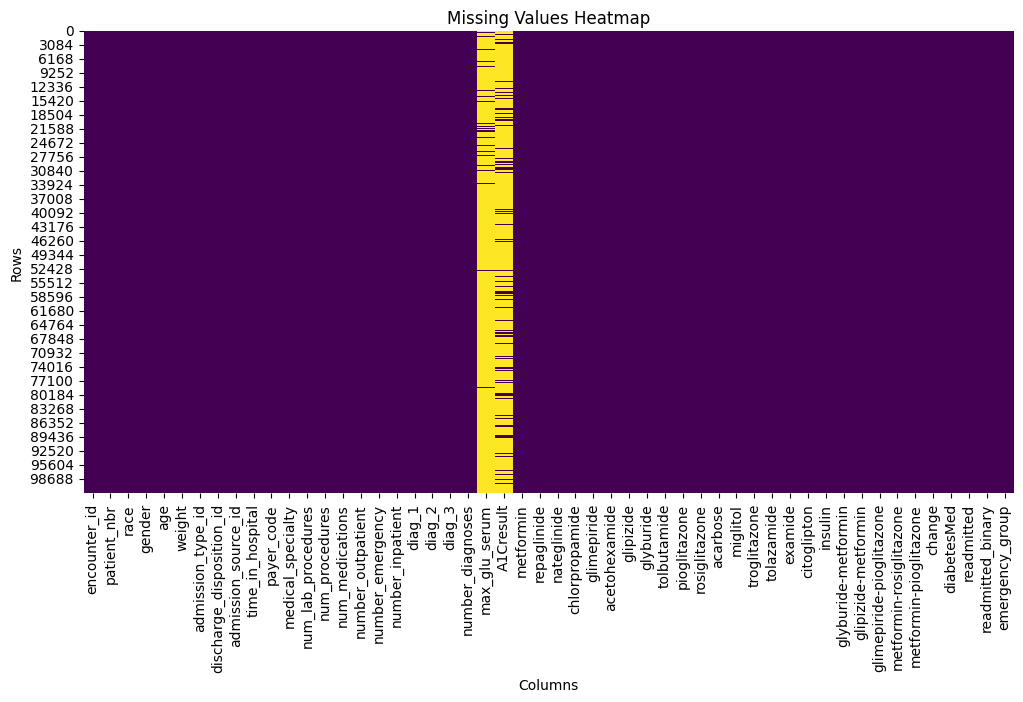

In [ ]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()



The dataset contains missing values represented both as NaN and as "?".

**Strategy for handling missing values:**
- Columns with a very high percentage of missing values (e.g., >50%) may be dropped, as they provide little useful information.
- For columns with moderate missingness, consider imputing values using the median (for numeric columns) or mode (for categorical columns).
- For categorical columns with missing values represented as '?', replace these with NaN before imputation or encoding.
- Always document and justify your approach to missing data, as it can impact downstream analysis and modeling.

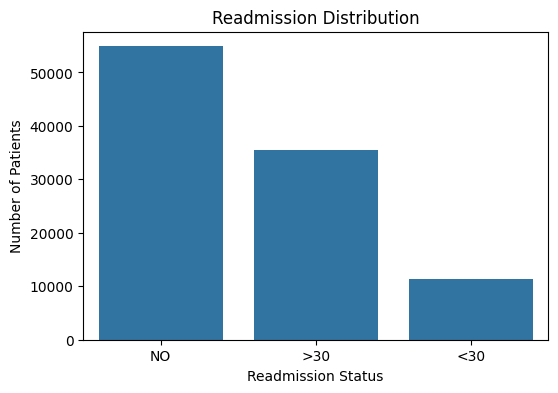

In [ ]:
# Visualize the distribution of the target variable (readmitted)
plt.figure(figsize=(6,4))
sns.countplot(x="readmitted", data=df)
plt.title("Readmission Distribution")
plt.xlabel("Readmission Status")
plt.ylabel("Number of Patients")
plt.show()

Most patients were not readmitted; fewer were readmitted within 30 days (<30)

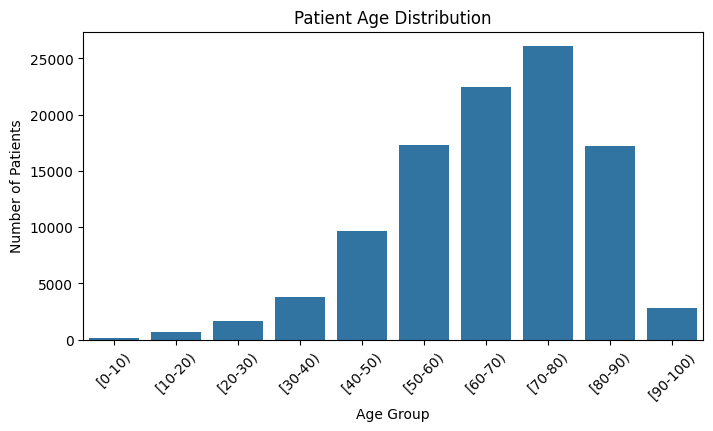

In [ ]:
# Visualize patient age distribution
plt.figure(figsize=(8,4))
sns.countplot(x="age", data=df, order=sorted(df["age"].unique()))
plt.title("Patient Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

Most patients are older adults, especially between 60–80 years

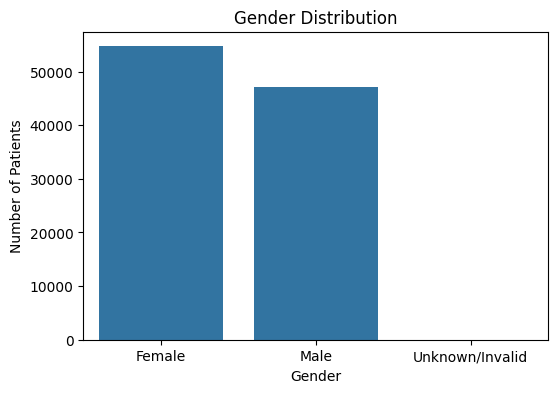

In [ ]:
# Visualize gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.show()

Dataset has slightly more female than male patients

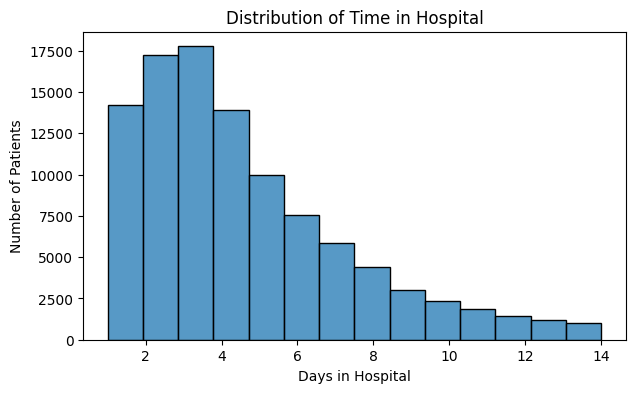

In [ ]:
# Visualize the distribution of length of hospital stay
plt.figure(figsize=(7,4))
sns.histplot(df["time_in_hospital"], bins=14)
plt.title("Distribution of Time in Hospital")
plt.xlabel("Days in Hospital")
plt.ylabel("Number of Patients")
plt.show()

Most patients stay between 2–5 days; long hospital stays are less common

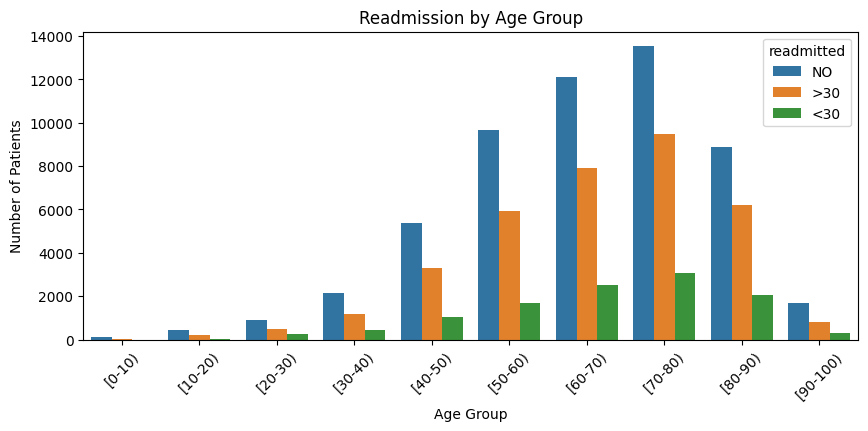

In [ ]:
# Visualize readmission by age group
plt.figure(figsize=(10,4))
sns.countplot(x="age", hue="readmitted", data=df, order=sorted(df["age"].unique()))
plt.title("Readmission by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

Readmissions are more frequent among older patients, especially age 60–80

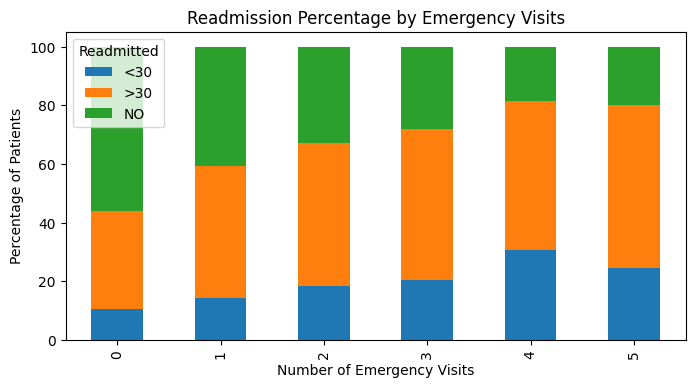

In [ ]:
# Visualize readmission rate by number of emergency visits (percentage)
subset = df[df["number_emergency"] <= 5]
# Create percentage table
percentage_table = pd.crosstab(subset["number_emergency"], subset["readmitted"], normalize="index") * 100
# Plot
percentage_table.plot(kind="bar", stacked=True, figsize=(8,4))
plt.title("Readmission Percentage by Emergency Visits")
plt.xlabel("Number of Emergency Visits")
plt.ylabel("Percentage of Patients")
plt.legend(title="Readmitted")
plt.show()

Patients with more emergency visits tend to have higher readmission rates

In [7]:
# For each categorical column, print the number of unique values and the top 5 most frequent values
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col} (unique: {df[col].nunique()}):")
    print(df[col].value_counts().head())


race (unique: 6):
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Name: count, dtype: int64

gender (unique: 3):
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

age (unique: 10):
age
[70-80)    26068
[60-70)    22483
[50-60)    17256
[80-90)    17197
[40-50)     9685
Name: count, dtype: int64

weight (unique: 10):
weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
Name: count, dtype: int64

payer_code (unique: 18):
payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
Name: count, dtype: int64

medical_specialty (unique: 73):
medical_specialty
?                         49949
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
Name: count, dtype: int64

diag_1 (unique: 717):
diag_1
428    6862
414    658

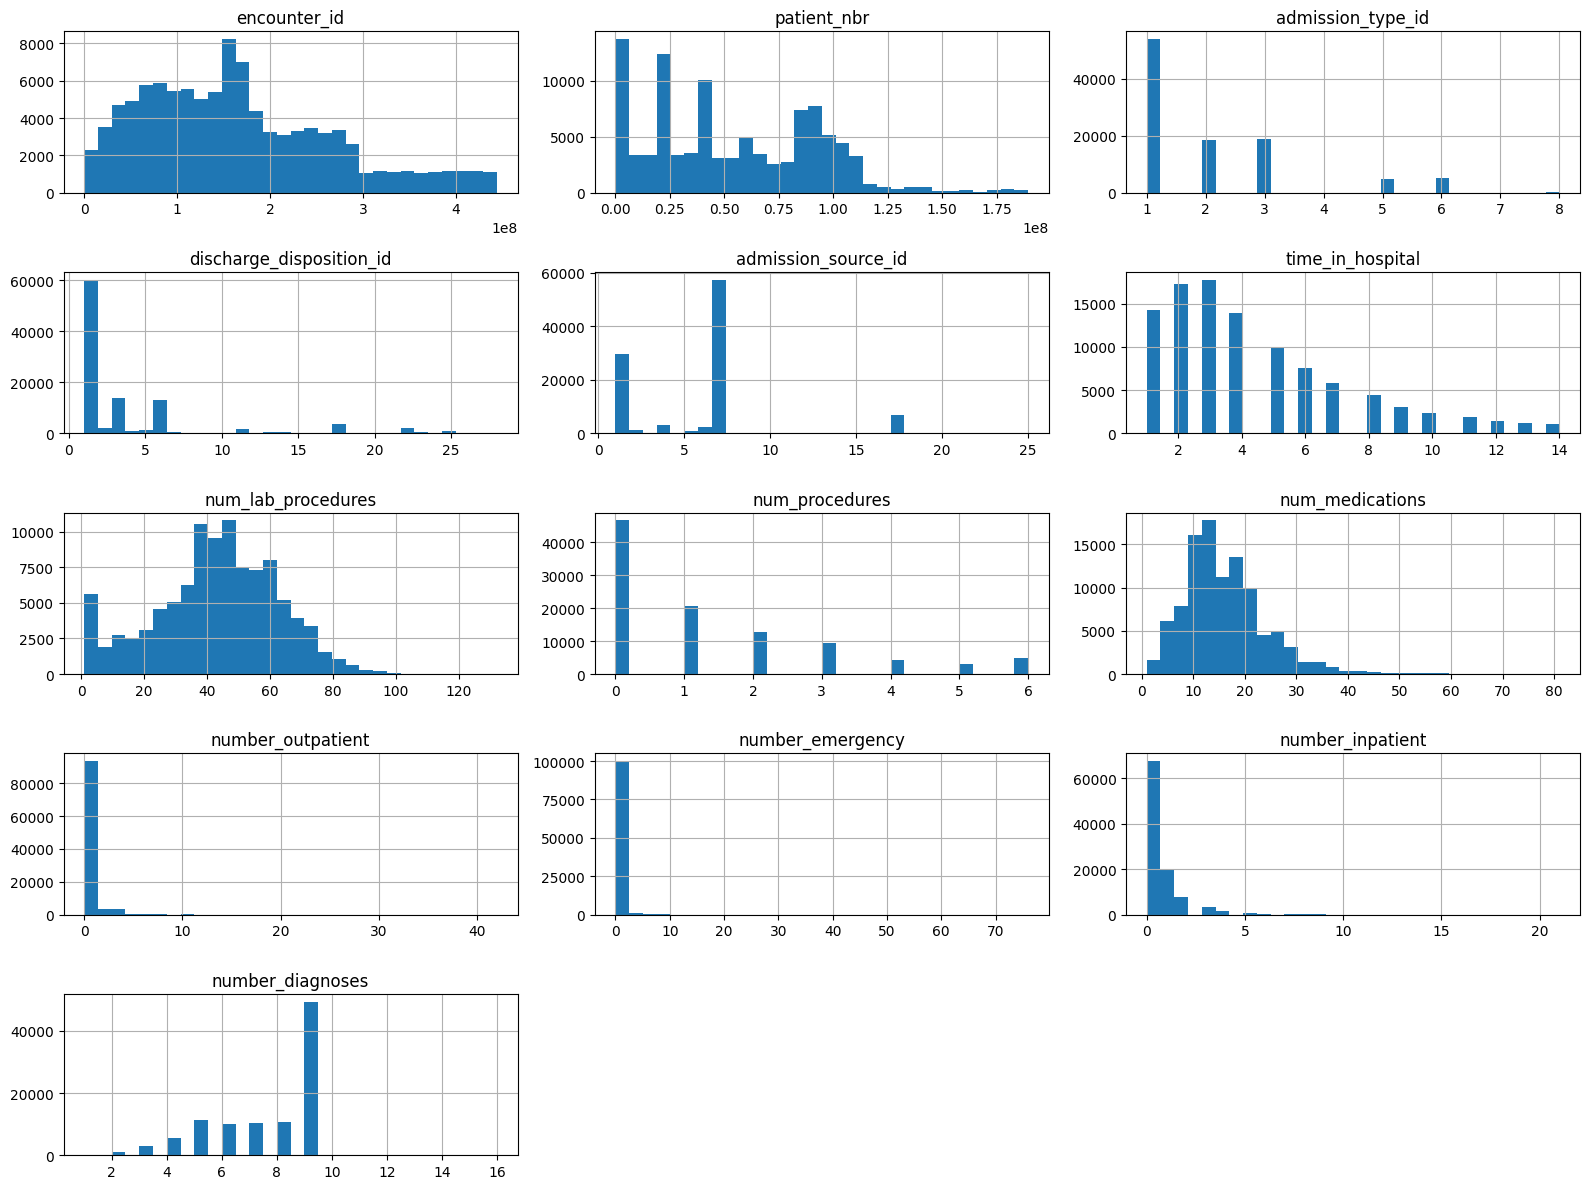

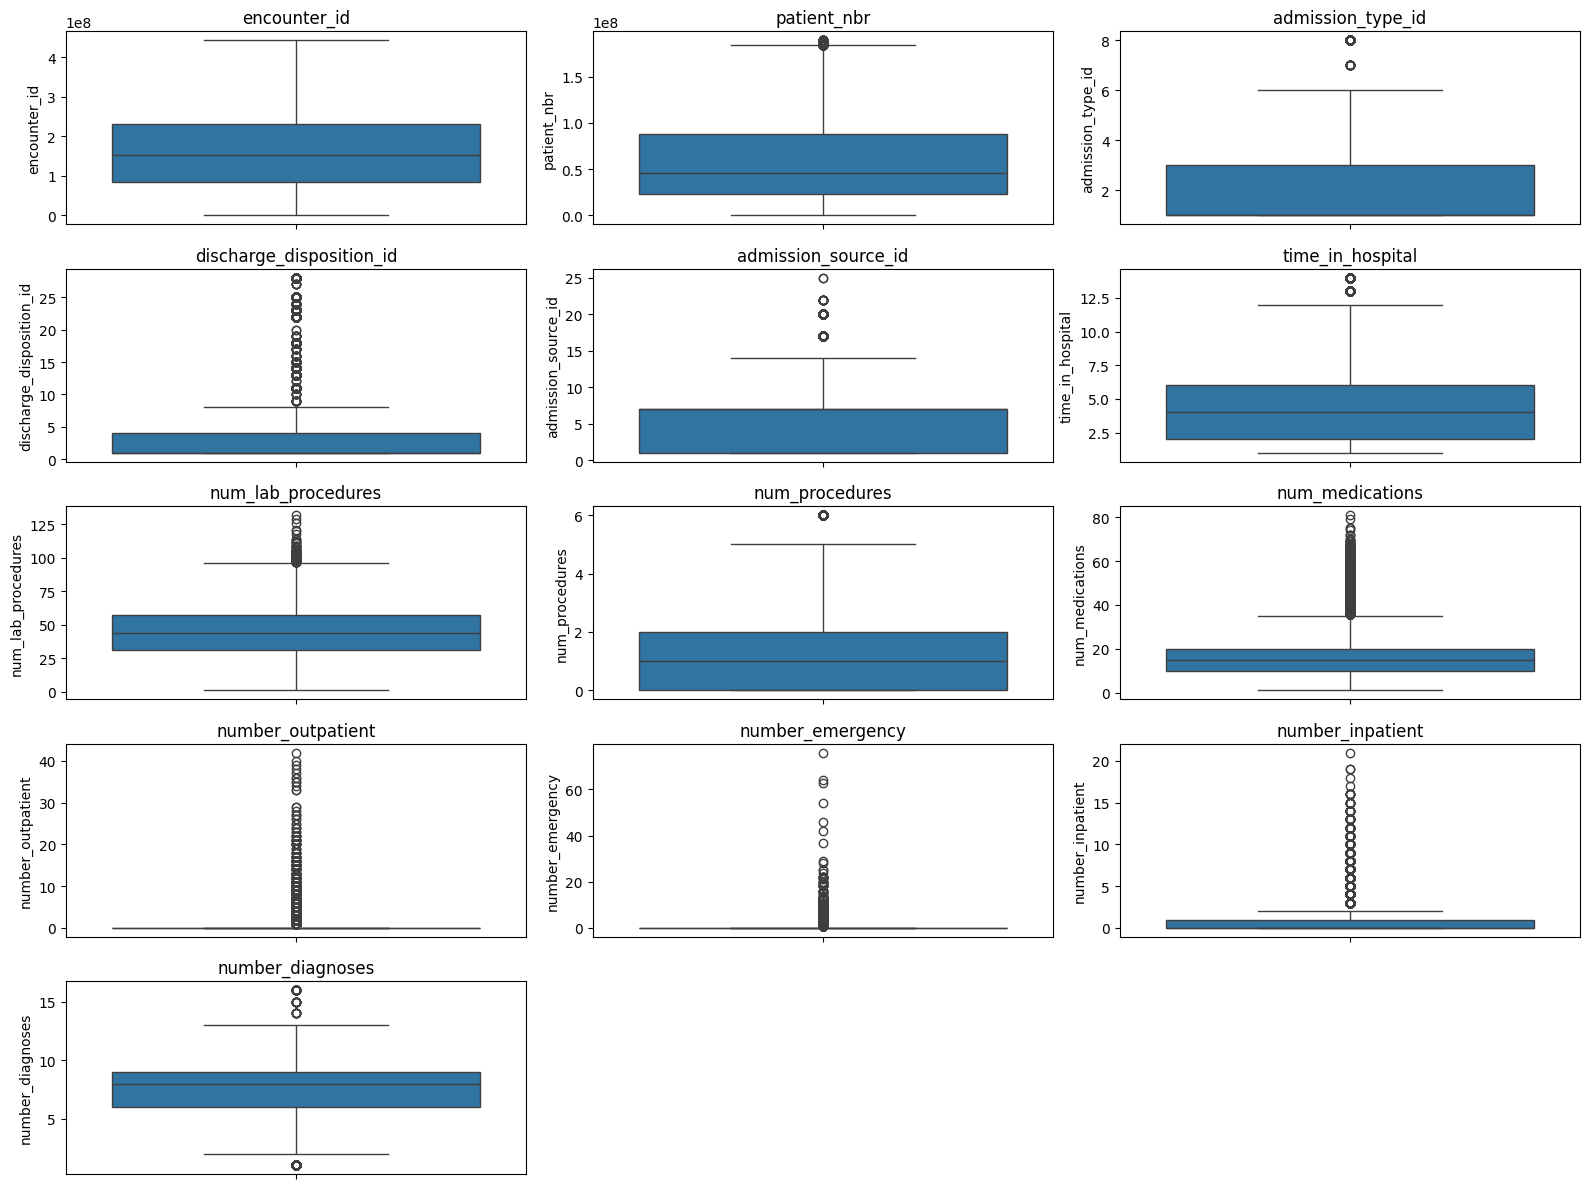

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [ ]:
# Histograms for all numeric columns

numeric_cols = df.select_dtypes(include=['number']).columns

df[numeric_cols].hist(bins=30, figsize=(16, 12), layout=(len(numeric_cols) // 3 + 1, 3))
plt.tight_layout()
plt.show()

# Boxplots for all numeric columns to check for outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary statistics for numeric columns
df[numeric_cols].describe().T

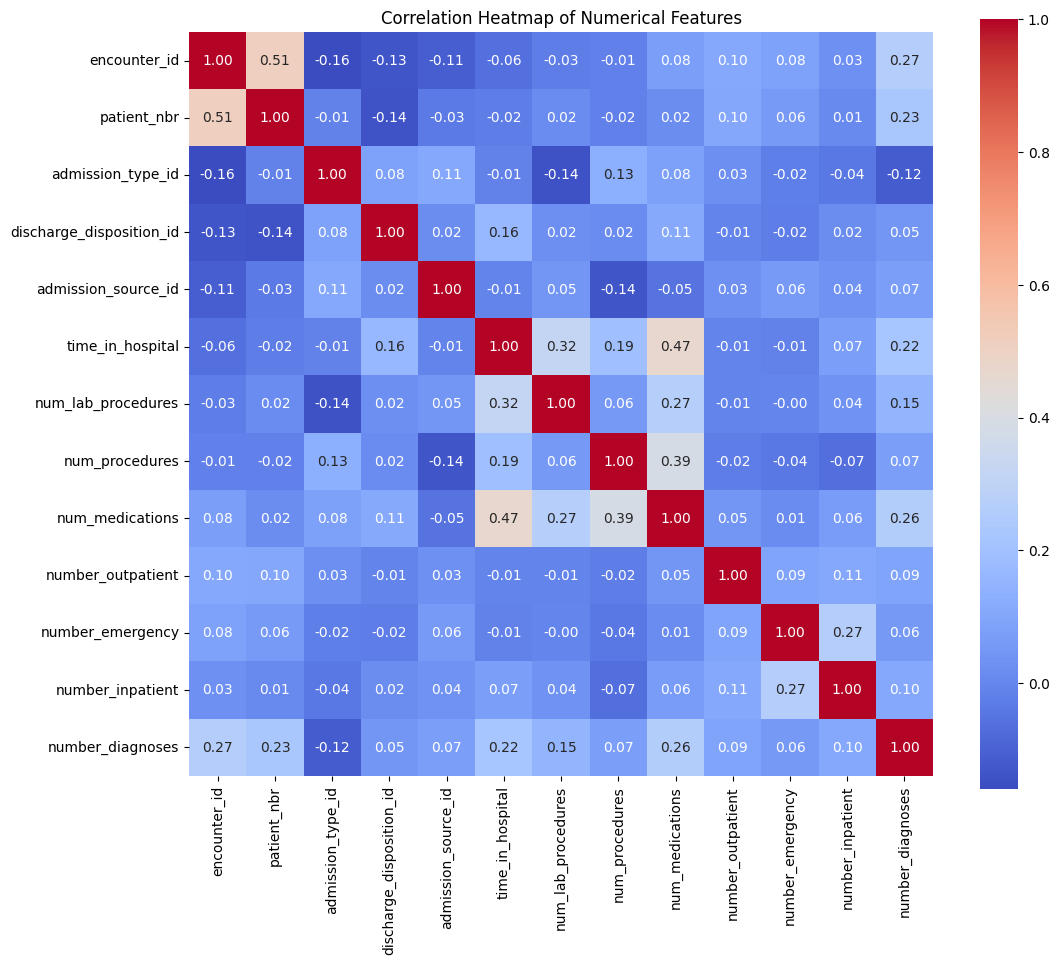

In [9]:
# Correlation heatmap for numerical features
corr = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Summary & Next Steps

- The dataset contains both numeric and categorical features, with some missing values and special missing indicators ('?').
- Key variables such as age, gender, and emergency visits show meaningful relationships with readmission.
- The target variable has been binarized for modeling.
- Outliers and correlations among numeric features have been visualized.

**Next steps:**
- Handle missing values (drop or impute as appropriate).
- Encode categorical variables for modeling.
- Save the cleaned dataset for use in preprocessing and modeling notebooks.